In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the dataset
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

## Exploratory Data Analysis

1. Finding statistical information for numerical features
2. Observing the distribution of data for numerical and categorical features.
3. Finding the number of NaN/missing values.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data dictionary :

    1. Survived : Did the passenger survive -> 0 = No, 1 = Yes -> Dependent variable.
    2. Pclass : Ticket class :- 1 = First class , 2 = Second Class, 3 = Third Class.
    3. SibSp : No. of siblings/spouse onboard.
    4. Parch : No. of parents/children onboard.
    5. Ticket : Ticket number
    6. Cabin : Cabin number.
    7. Embarked : Port of embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton.
    

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train['test_data'] = 0
test['test_data'] = 1
test['Survived'] = np.NaN

In [8]:
# Merging both train and test dataset for EDA
df = pd.concat(objs = [train,test])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  test_data    1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [10]:
df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
test_data         0
dtype: int64

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292
test_data,1309.0,0.319328,0.466394,0.00,0.0000,0.0000,1.000,1.0000


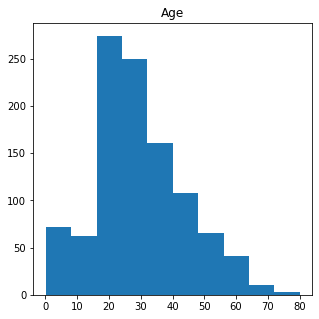

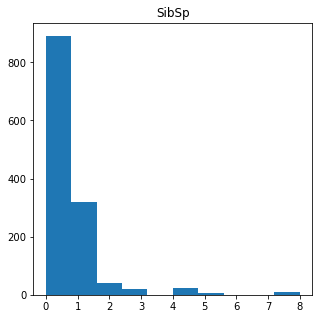

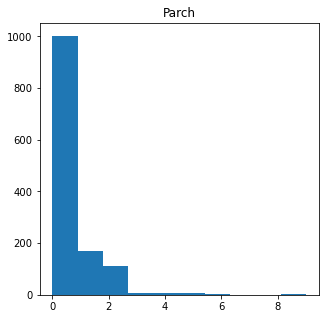

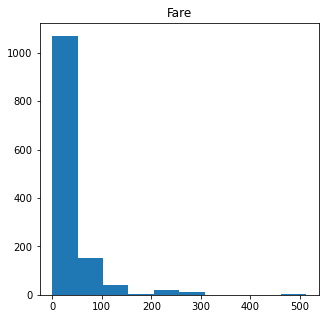

In [12]:
# Plotting histograms for numerical features to see the distributions.
numerical_columns = ['Age','SibSp','Parch','Fare']
for column in numerical_columns:
    plt.figure(figsize=(5,5))
    plt.hist(df[column])
    plt.title(column)
    plt.show()

In [13]:
# As we can see, only Age column shows Normal distribution

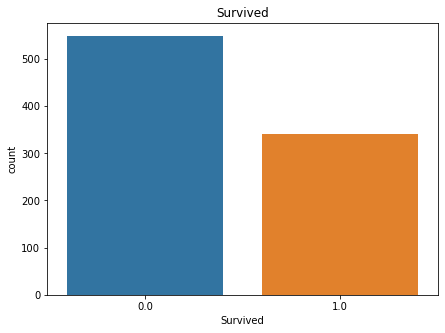

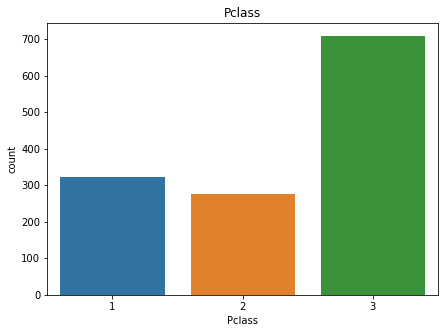

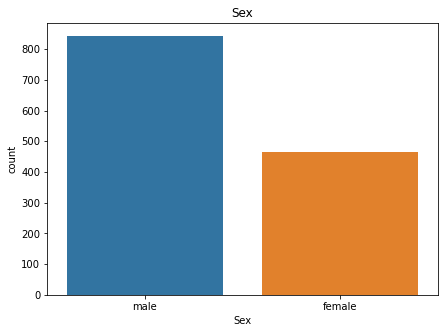

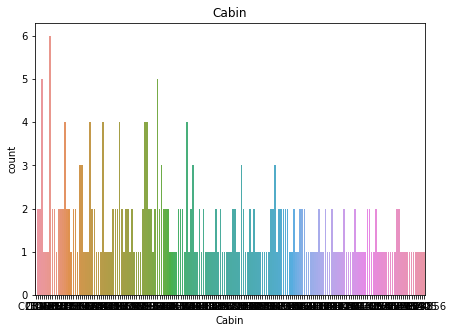

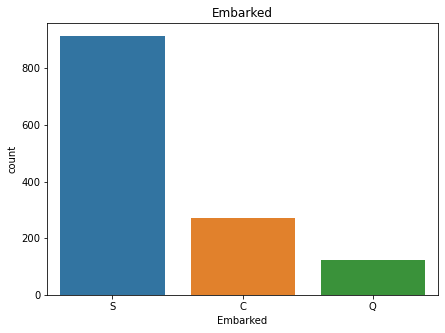

In [14]:
# Plotting countplots for categorical features
categorical_columns = ['Survived','Pclass','Sex','Cabin','Embarked']
for column in categorical_columns:
    plt.figure(figsize=(7,5))
    sns.countplot(x=df[column])
    plt.title(column)
    plt.show()

In [15]:
def bar_chart(feature):
    survived = df[(df.test_data==0) & (df['Survived']==1)][feature].value_counts()
    dead = df[(df.test_data==0) & (df['Survived']==0)][feature].value_counts()
    temp_df = pd.DataFrame([survived,dead])
    temp_df.index = ['Survived','Dead']
    temp_df.plot(kind='bar',stacked=True,figsize=(10,5))

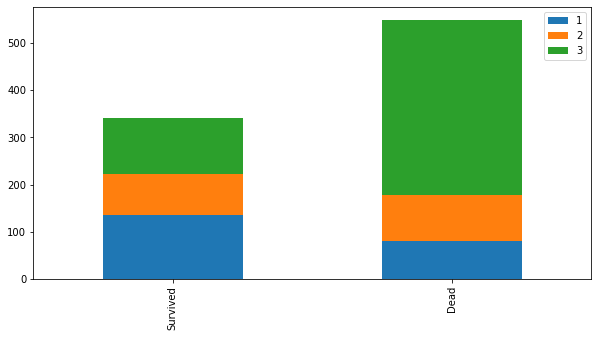

In [16]:
bar_chart('Pclass')

In [17]:
# Insight :- Passengers from Pclass 3 have died the most, and those from 1st class have survived more.

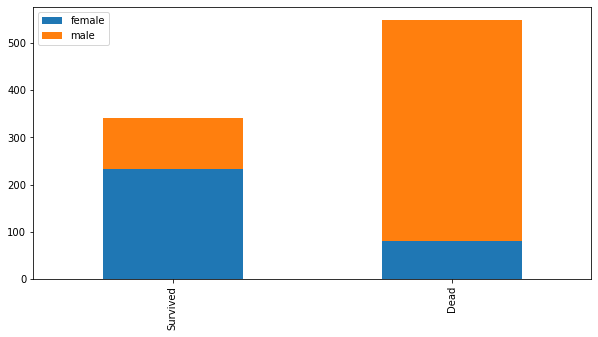

In [18]:
bar_chart('Sex')

In [19]:
# Insight :- More men have died than women.

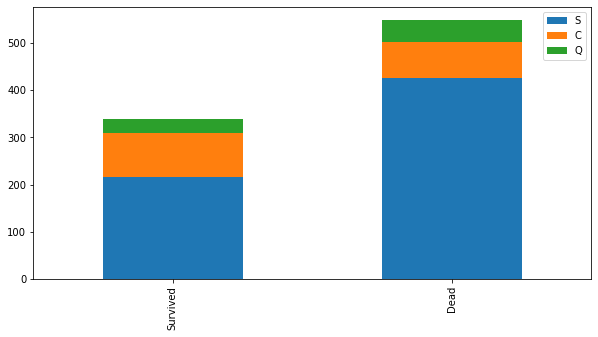

In [20]:
bar_chart('Embarked')

In [21]:
# Insight :- More people have died from Southhampton and Queenstown. People from Cherbourg have roughly 50 % of survival.

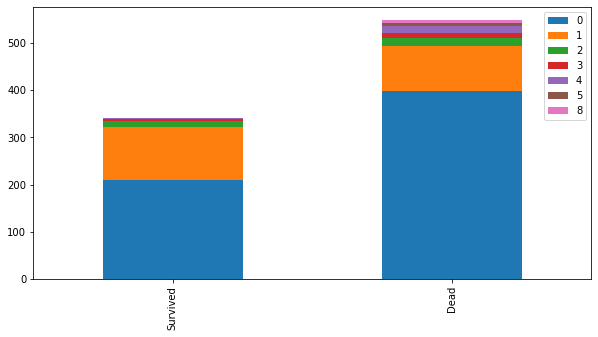

In [22]:
bar_chart('SibSp')

In [23]:
# Insight :- People with no sibling/spouse have died the most. People with 1 sibling/spouse have roughly 50 % chances of survival. People with 2 or more siblings/spouses are more likely to die.

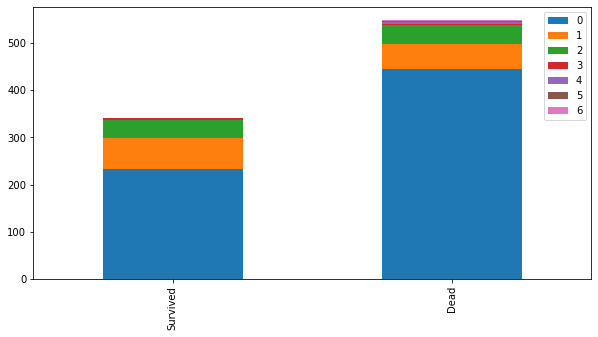

In [24]:
bar_chart('Parch')

In [25]:
# Insight :- People with no parents/children are more likely to die. People with one and two parent(s)/child(ren) have 50 % chances of survival. People with 3 or more parents/children are more likely to die.

## Feature Engineering

In [26]:
# Creating a new column of 'name_title' from 'Name' feature.
# Sample name: Braund, Mr. Owen Harris
df['name_title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df['name_title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
Capt              1
Dona              1
Mme               1
the Countess      1
Don               1
Sir               1
Lady              1
Name: name_title, dtype: int64

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_data,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Dona
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr


In [28]:
# Note :- We keep the first 4 titles and list the remaining to the category called 'Other'.

In [29]:
most_frequent_titles = ['Mr','Miss','Mrs','Master']
df['name_title'] = df['name_title'].apply(lambda x: x if x in most_frequent_titles else 'Other')
df['name_title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      34
Name: name_title, dtype: int64

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,test_data,name_title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Other
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1,Mr


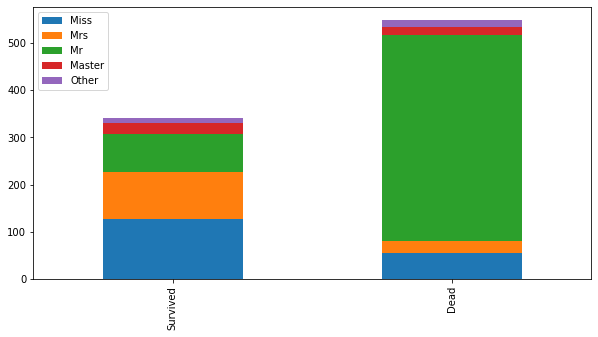

In [31]:
bar_chart('name_title')

In [32]:
# Insight :- Miss and Mrs titles have high chances of survival. Mr title has very high chances of death. Other titles have roughly 50% channces of survival

In [33]:
# Creating a new column of 'cabin_init' from 'Cabin' feature assuming same initials are clustered togeather
# Sample Cabin: C23
df['cabin_init'] = df['Cabin'].apply(lambda x: str(x)[0])
df['cabin_init'].value_counts()

n    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: cabin_init, dtype: int64

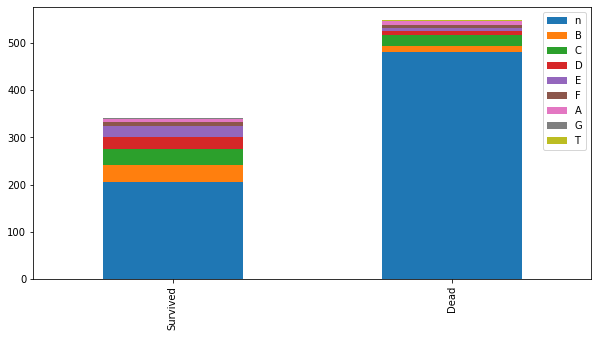

In [34]:
bar_chart('cabin_init')

In [35]:
# Insight :- Missing values in cabin numbers have very high chances of death. People from B,C,D,E have very high chances of survival.

In [36]:
# Creating a new column of 'ticket_numeric' from 'Ticket' feature
# Sample Ticket: 112053 and PC 17603
df['ticket_numeric'] = df['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
df['ticket_numeric'].value_counts()

1    957
0    352
Name: ticket_numeric, dtype: int64

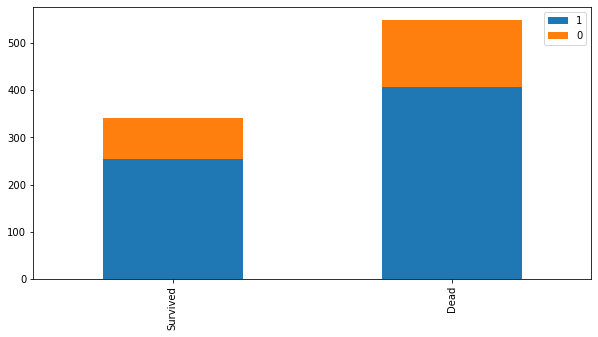

In [37]:
bar_chart('ticket_numeric')

In [38]:
# No useful insight.

# Data Preprocessing

## Data Cleaning

In [39]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'test_data',
       'name_title', 'cabin_init', 'ticket_numeric'],
      dtype='object')

In [40]:
# Removing column(s) that don't provide any significant insights
print("Before removing the unwanted columns: {}".format(df.shape))
df.drop(labels=['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
print("After removing the unwanted columns: {}".format(df.shape))

Before removing the unwanted columns: (1309, 16)
After removing the unwanted columns: (1309, 12)


In [41]:
df.isna().sum()

Survived          418
Pclass              0
Sex                 0
Age               263
SibSp               0
Parch               0
Fare                1
Embarked            2
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [42]:
# For 'Age', we need to visualize it's distribution to see if any outliers are present. If yes -> use median as it reduces outliers. If no -> Mean can be considered.

Text(0.5, 1.0, 'Histogram for Age feature')

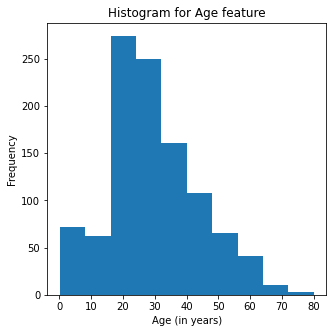

In [43]:
# Plotting histogram for 'Age'
plt.figure(figsize=(5,5))
plt.hist(x=df['Age'],bins=10,histtype='bar',orientation='vertical')
plt.xlabel('Age (in years)')
plt.ylabel('Frequency')
plt.title('Histogram for Age feature')

Text(0.5, 1.0, 'Boxplot for Age')

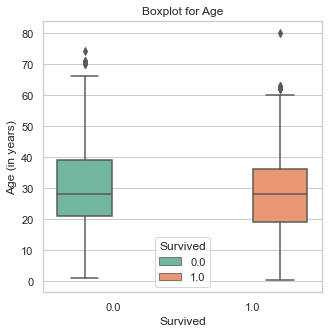

In [44]:
# Plotting boxplot for 'Age'
plt.figure(figsize=(5,5))
sns.set(style='whitegrid')
ax = sns.boxplot(x='Survived',y='Age',hue='Survived',data=df,palette='Set2')
plt.ylabel('Age (in years)')
plt.title('Boxplot for Age')

In [45]:
# Replacing NaN Age by median of the 'Age'
print('Number of NaN values in "Age" before : {}'.format(df['Age'].isna().sum()))
df['Age'] = df['Age'].fillna(df['Age'].median())
print('Number of NaN values in "Age" after : {}'.format(df['Age'].isna().sum()))

Number of NaN values in "Age" before : 263
Number of NaN values in "Age" after : 0


In [46]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,n,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,male,28.0,0,0,8.0500,S,1,Mr,n,0
414,NaN,1,female,39.0,0,0,108.9000,C,1,Other,C,0
415,NaN,3,male,38.5,0,0,7.2500,S,1,Mr,n,0
416,NaN,3,male,28.0,0,0,8.0500,S,1,Mr,n,1


In [47]:
# For 'Embarked' column since it's a categorical feature, we can use the following techniques to handle the null values :-
#Deleting the NaN/missing rows
#Replace NaN with most frequent value
#Apply classifying algorithm for predicting the values

In [48]:
df.isna().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                1
Embarked            2
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

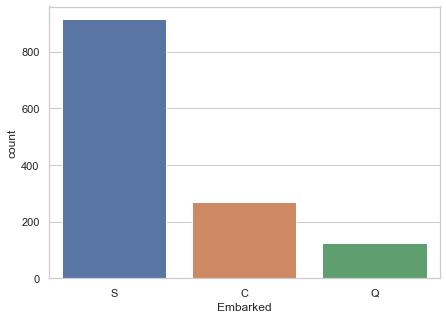

In [49]:
# Let's plot the countplot for Embarked.
plt.figure(figsize=(7,5))
sns.countplot(x='Embarked',data=df)

In [50]:
# Clearly 'S' is the most common record in 'Embarked', so we can replace the missing values with 'S'
print("No. of missing values in 'Embarked' column before : {}".format(df['Embarked'].isna().sum()))
df['Embarked'] = df['Embarked'].fillna('S')
print("No. of missing values in 'Embarked' column after : {}".format(df['Embarked'].isna().sum()))

No. of missing values in 'Embarked' column before : 2
No. of missing values in 'Embarked' column after : 0


In [51]:
df.isna().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                1
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

Text(0.5, 1.0, 'Box-plot for Fare feature')

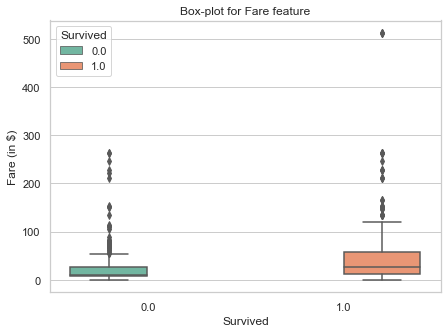

In [52]:
# Plotting box-plot for 'Fare'
plt.figure(figsize=(7,5))
sns.boxplot(x='Survived',y = 'Fare',data=df,hue='Survived',palette='Set2')
plt.ylabel('Fare (in $)')
plt.title('Box-plot for Fare feature')

In [53]:
# Using median to replace NaN value for 'Fare'
print("No. of NaN values in Fare column before : {}".format(df['Fare'].isna().sum()))
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
print("No. of NaN values in Fare column after : {}".format(df['Fare'].isna().sum()))

No. of NaN values in Fare column before : 1
No. of NaN values in Fare column after : 0


In [54]:
df.isna().sum()

Survived          418
Pclass              0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [55]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,male,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,female,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,female,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,female,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,male,35.0,0,0,8.0500,S,0,Mr,n,1


In [56]:
# Converting Sex feature to a binary feature.
print('Datatype of Sex feature before : {}'.format(df['Sex'].dtype))
df['Sex'] = df['Sex'].apply(lambda x : 1 if (x=='male') else 0)
print('Datatype of Sex feature before : {}'.format(df['Sex'].dtype))

Datatype of Sex feature before : object
Datatype of Sex feature before : int64


In [57]:
print('Column name before : {}'.format(df.columns[2]))
df.rename(mapper={"Sex":"Sex_male"},axis=1,inplace=True)
print('Column name after : {}'.format(df.columns[2]))

Column name before : Sex
Column name after : Sex_male


In [58]:
df.columns

Index(['Survived', 'Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'test_data', 'name_title', 'cabin_init', 'ticket_numeric'],
      dtype='object')

In [59]:
df

,Survived,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,1,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,0,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,0,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,0,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,1,35.0,0,0,8.0500,S,0,Mr,n,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,28.0,0,0,8.0500,S,1,Mr,n,0
414,NaN,1,0,39.0,0,0,108.9000,C,1,Other,C,0
415,NaN,3,1,38.5,0,0,7.2500,S,1,Mr,n,0
416,NaN,3,1,28.0,0,0,8.0500,S,1,Mr,n,1


In [60]:
df.isna().sum()

Survived          418
Pclass              0
Sex_male            0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
test_data           0
name_title          0
cabin_init          0
ticket_numeric      0
dtype: int64

In [61]:
df

,Survived,Pclass,Sex_male,Age,SibSp,Parch,Fare,Embarked,test_data,name_title,cabin_init,ticket_numeric
0,0.0,3,1,22.0,1,0,7.2500,S,0,Mr,n,0
1,1.0,1,0,38.0,1,0,71.2833,C,0,Mrs,C,0
2,1.0,3,0,26.0,0,0,7.9250,S,0,Miss,n,0
3,1.0,1,0,35.0,1,0,53.1000,S,0,Mrs,C,1
4,0.0,3,1,35.0,0,0,8.0500,S,0,Mr,n,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,1,28.0,0,0,8.0500,S,1,Mr,n,0
414,NaN,1,0,39.0,0,0,108.9000,C,1,Other,C,0
415,NaN,3,1,38.5,0,0,7.2500,S,1,Mr,n,0
416,NaN,3,1,28.0,0,0,8.0500,S,1,Mr,n,1


In [62]:
# Converting Embarked column using get_dummies()
print('Shape of df before: {}'.format(df.shape))
df = pd.get_dummies(data=df, columns=['Embarked', 'name_title', 'cabin_init'], drop_first=True)
print('Shape of df after: {}'.format(df.shape))

Shape of df before: (1309, 12)
Shape of df after: (1309, 23)


## Feature Selection

In [63]:
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier

temp_X_train = df[df['test_data']==0].drop(['Survived'],axis=1)
temp_y_train = df[df['test_data']==0]['Survived']

etc = ExtraTreesClassifier()
etc.fit(temp_X_train,temp_y_train)

ExtraTreesClassifier()

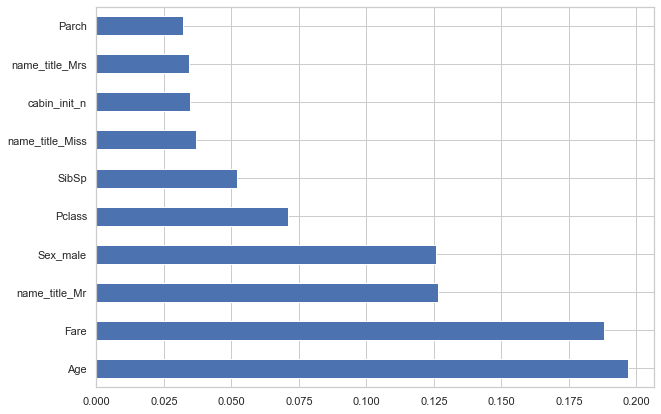

In [65]:
plt.figure(figsize=(10,7))
feature_score = pd.Series(etc.feature_importances_,index=temp_X_train.columns)
feature_score.nlargest(10).plot(kind = 'barh')
plt.show()

In [67]:
feature_score.nlargest(10).index # Selecting top 10 important features

Index(['Age', 'Fare', 'name_title_Mr', 'Sex_male', 'Pclass', 'SibSp',
       'name_title_Miss', 'cabin_init_n', 'name_title_Mrs', 'Parch'],
      dtype='object')

In [72]:
df_important_features = df[['Age', 'Fare', 'name_title_Mr', 'Sex_male', 'Pclass', 'SibSp',
       'name_title_Miss', 'cabin_init_n', 'name_title_Mrs', 'Parch','Survived','test_data']]

In [73]:
df_important_features.columns

Index(['Age', 'Fare', 'name_title_Mr', 'Sex_male', 'Pclass', 'SibSp',
       'name_title_Miss', 'cabin_init_n', 'name_title_Mrs', 'Parch',
       'Survived', 'test_data'],
      dtype='object')

## Feature Scaling

In [75]:
# Splitting the dataset into train set and test set
X_train = df_important_features[df_important_features['test_data']==0].drop(['Survived'], axis=1)
X_train.drop(['test_data'], axis=1, inplace=True)
y_train = df_important_features[df_important_features['test_data']==0]['Survived']
X_test = df_important_features[df_important_features['test_data']==1].drop(['Survived'], axis=1)
X_test.drop(['test_data'], axis=1, inplace=True)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (891, 10), X_test size: (418, 10)


In [76]:
# Feature Scaling using StandardScalar
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Model Building

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring='accuracy')
print('--- Average Accuracy: {}% ---'.format(round(cv.mean()*100, 4)))
print('Scores for each cycle: {}'.format(cv))

--- Average Accuracy: 81.8165% ---
Scores for each cycle: [0.83333333 0.82022472 0.75280899 0.85393258 0.82022472 0.76404494
 0.84269663 0.82022472 0.83146067 0.84269663]


In [81]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=2000)

In [85]:
prediction = lr.predict(X_test_scaled)

In [87]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction.astype(int)
    })

submission.to_csv('logreg_submission.csv', index=False)